<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

C:\Users\Himanshu Pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

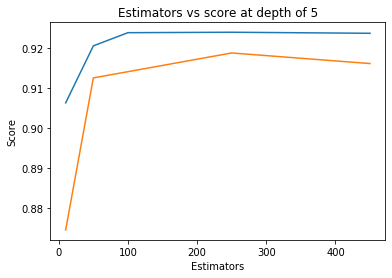

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


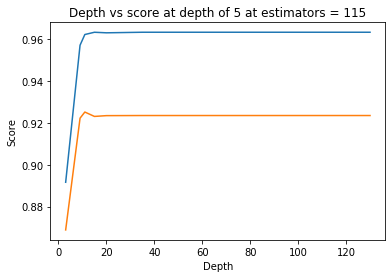

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


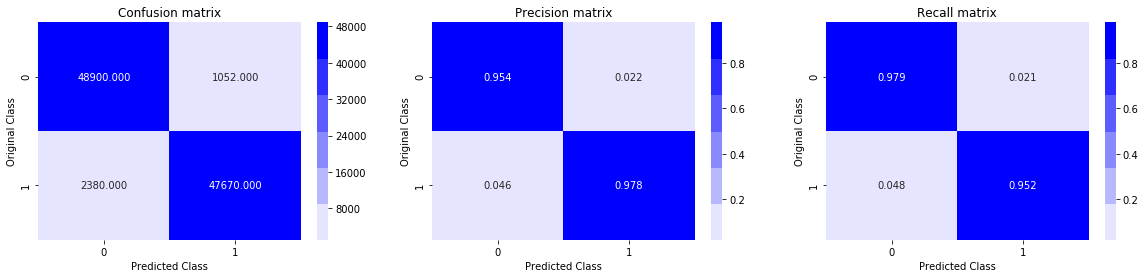

Test confusion_matrix


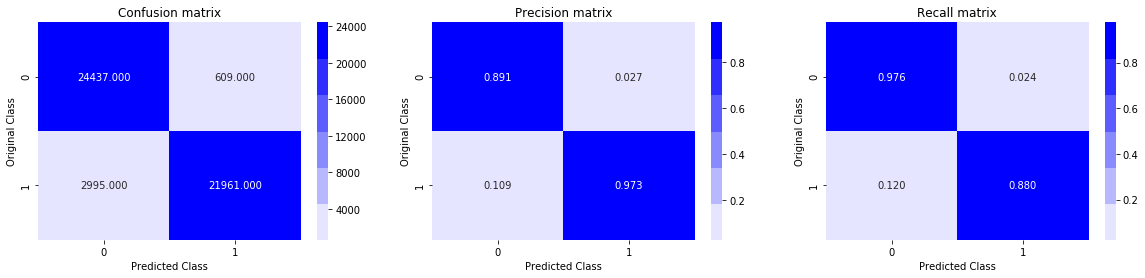

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

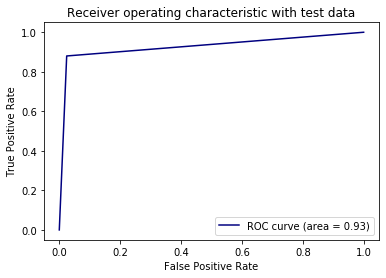

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

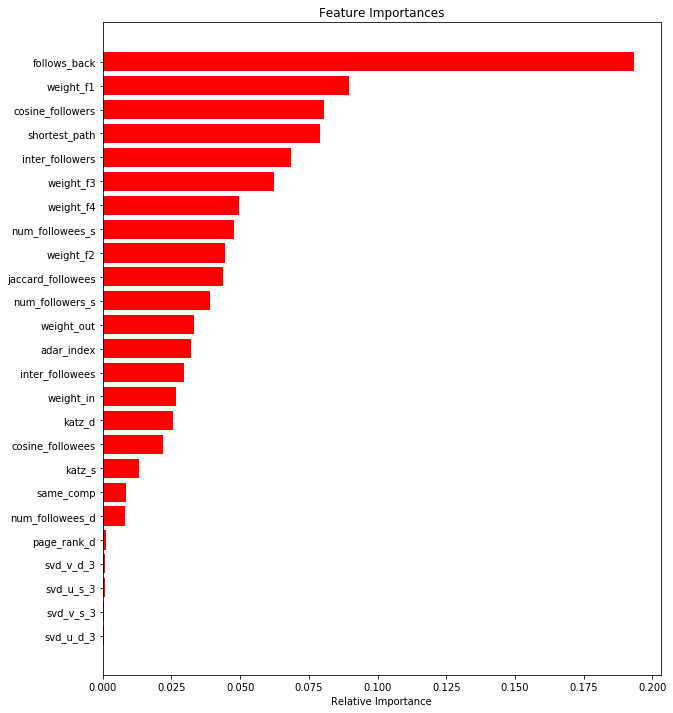

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

## Preferential Attachment 

In [17]:
#from pandas import read_hdf
final_xtr = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
final_xte = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')                     

In [18]:
# Reading list of edges 
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [19]:
in_degree = dict(train_graph.in_degree())
out_degree = dict(train_graph.out_degree())

In [20]:
def Prefer (x,y,typ):
    try:
        return typ.get(x)*typ.get(y)
    except:
        return 0

In [21]:
if not os.path.isfile('data/fea_sample/storage_sample_stage5.h5'):
    #mapping preferential followers to train and test data
    final_xtr['pref_followers'] = final_xtr.apply(lambda row:
                                            Prefer(row['source_node'],row['destination_node'],out_degree),axis=1)
    final_xte['pref_followers'] = final_xte.apply(lambda row:
                                            Prefer(row['source_node'],row['destination_node'],out_degree),axis=1)

    # mapping preferential followees to train and test data
    final_xtr['pref_followees'] = final_xtr.apply(lambda row:
                                            Prefer(row['source_node'],row['destination_node'],in_degree),axis=1)
    final_xte['pref_followees'] = final_xte.apply(lambda row:
                                            Prefer(row['source_node'],row['destination_node'],in_degree),axis=1)
    
    
    hdf = HDFStore('data/fea_sample/storage_sample_stage5.h5')
    hdf.put('train_df',final_xtr, format='table', data_columns=True)
    hdf.put('test_df',final_xte, format='table', data_columns=True)
    hdf.close()
else:
    final_xtr = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
    final_xte = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')


### SVD Dot

In [24]:
#For source & destination in the training set
sou_u=final_xtr[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5','svd_u_s_6']]
sou_v=final_xtr[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5','svd_v_s_6']]
des_u=final_xtr[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5','svd_u_d_6']]
des_v=final_xtr[['svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5','svd_v_d_6']]

In [26]:
svd_dot_u=[]
svd_dot_v=[]
for i in range(len(sou_u)):
    svd_dot_u.append(np.dot(sou_u.values[i],des_u.values[i]))
    svd_dot_v.append(np.dot(sou_v.values[i],des_v.values[i]))
final_xtr['svd_dot_u']=svd_dot_u
final_xtr['svd_dot_v']=svd_dot_v

In [27]:
sou_u=final_xte[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5','svd_u_s_6']]
sou_v=final_xte[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5','svd_v_s_6']]
des_u=final_xte[['svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5','svd_u_d_6']]
des_v=final_xte[['svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5','svd_v_d_6']]

In [28]:
svd_dot_u=[]
svd_dot_v=[]
for i in range(len(sou_u)):
    svd_dot_u.append(np.dot(sou_u.values[i],des_u.values[i]))
    svd_dot_v.append(np.dot(sou_v.values[i],des_v.values[i]))
final_xte['svd_dot_u']=svd_dot_u
final_xte['svd_dot_v']=svd_dot_v

In [29]:
final_xtr.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_followers,pref_followees,svd_dot_u,svd_dot_v
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,120,66,1.114958e-11,2.238775e-12
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,8662,1598,3.192812e-03,9.068719e-04
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,902,980,1.787503e-35,2.467873e-36
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,35,22,4.710376e-20,3.159386e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,33,5,7.773952e-14,0.000000e+00


In [30]:
final_xte.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_followers,pref_followees,svd_dot_u,svd_dot_v
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,...,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,54,84,8.425267e-20,2.074808e-17
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,...,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,19,34,1.352160e-17,1.188376e-17
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,...,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,144,150,3.671980e-13,3.904885e-12
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,...,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,340,407,1.634044e-10,9.819784e-11
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,...,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,405,324,1.246700e-11,1.300892e-11


In [31]:
if not os.path.isfile('data/fea_sample/storage_sample_stage6.h5'): 
    #SVD_dot for U
    final_xtr['svd_dot_U'] = final_xtr.apply(lambda row: svd_dot(row['source_node'], row['destination_node']), axis=1) 
    final_xte['svd_dot_U'] = final_xte.apply(lambda row: svd_dot(row['svd_u_s_1'], row['svd_u_d_1']), axis=1) 
    
    #SVD_dot for V
    final_xtr['svd_dot_2'] = final_xte.apply(lambda row: svd_dot(row['svd_u_s_2'], row['svd_u_d_2']), axis=1) 
    final_xte['svd_dot_3'] = final_xte.apply(lambda row: svd_dot(row['svd_u_s_3'], row['svd_u_d_3']), axis=1) 
    
    hdf = HDFStore('data/fea_sample/storage_sample_stage6.h5')
    hdf.put('train_df',final_xtr, format='table', data_columns=True)
    hdf.put('test_df',final_xte, format='table', data_columns=True)
    hdf.close()
else:
    final_xtr = read_hdf('data/fea_sample/storage_sample_stage6.h5', 'train_df',mode='r')
    final_xte = read_hdf('data/fea_sample/storage_sample_stage6.h5', 'test_df',mode='r')


In [32]:
final_xtr.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_5,svd_v_d_6,pref_followers,pref_followees,svd_dot_1,svd_dot_2,svd_dot_3,svd_dot_4,svd_dot_5,svd_dot_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,9.771077e-13,4.159752e-14,120,66,3.395797e-24,2.490079e-25,1.114958e-11,7.961319e-25,5.587203e-25,1.283580e-23
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,2.607801e-11,2.372904e-09,8662,1598,1.159480e-24,1.689511e-20,6.774508e-20,3.192812e-03,2.477266e-22,1.253154e-18
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,1.629341e-19,-2.572452e-19,902,980,1.277284e-35,7.011467e-37,2.894193e-37,2.929450e-36,2.583314e-37,9.238392e-37
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,3.047045e-10,1.246592e-13,35,22,2.619942e-24,5.825985e-24,4.650022e-20,1.705371e-25,5.949183e-22,7.671366e-30
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,0.000000e+00,0.000000e+00,33,5,8.693381e-26,2.728218e-26,7.773952e-14,3.146677e-27,1.895144e-26,6.247367e-29


In [33]:
y_train = final_xtr.indicator_link
y_test = final_xte.indicator_link

In [34]:
final_xtr.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
final_xte.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

### Applying XGBoost with all above features

In [35]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"max_depth":[1, 3, 5, 7, 10],
             "n_estimators":[10, 50, 100, 200, 500]}
model = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=92), param_distributions=param_grid,n_iter=10,scoring='f1',cv=3,n_jobs=-1)
model.fit(final_xtr, y_train)
model.best_params_

{'n_estimators': 500, 'max_depth': 7}

In [36]:
train_auc = model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']

In [37]:
#Results of grid Search
best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)

0.9824502700489093
{'n_estimators': 500, 'max_depth': 7}


In [38]:
model.cv_results_

{'mean_fit_time': array([ 15.6524872 ,  25.3045462 , 185.03030229,   2.58176525,
          1.83110611,  66.9736588 ,  51.02794528,  75.58331362,
         33.50311955,  31.35652343]),
 'std_fit_time': array([1.99229989, 0.05207163, 2.22103943, 0.0326367 , 0.0342305 ,
        1.44286924, 1.80848166, 0.61451051, 0.97423891, 1.77058118]),
 'mean_score_time': array([0.18085011, 0.20312381, 0.42951918, 0.15857633, 0.1486028 ,
        0.22174096, 0.21243231, 0.27193999, 0.19281777, 0.11967993]),
 'std_score_time': array([0.02785769, 0.02200701, 0.01186606, 0.02850114, 0.01494909,
        0.02450158, 0.01000664, 0.00204947, 0.0223655 , 0.02447071]),
 'param_n_estimators': masked_array(data=[50, 100, 500, 10, 10, 200, 100, 500, 500, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[7, 5, 7, 5, 3, 7, 10, 3, 1, 7],
              mask=[False,

In [39]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-b
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visu
#https://qiita.com/bmj0114/items/8009f282c99b77780563
#Saving the obtained results from gridsearch in two dimensional array as dataframe
results = pd.DataFrame(model.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.652487,1.992300,0.180850,0.027858,50,7,"{'n_estimators': 50, 'max_depth': 7}",0.974892,0.974137,0.973691,0.974240,0.000496,7,0.974264,0.975028,0.975745,0.975012,0.000605
1,25.304546,0.052072,0.203124,0.022007,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.976499,0.975450,0.974485,0.975478,0.000822,6,0.977172,0.977404,0.977153,0.977243,0.000114
2,185.030302,2.221039,0.429519,0.011866,500,7,"{'n_estimators': 500, 'max_depth': 7}",0.983342,0.981817,0.982192,0.982450,0.000649,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,2.581765,0.032637,0.158576,0.028501,10,5,"{'n_estimators': 10, 'max_depth': 5}",0.929864,0.930654,0.929849,0.930122,0.000376,9,0.930988,0.928878,0.930570,0.930145,0.000912
4,1.831106,0.034231,0.148603,0.014949,10,3,"{'n_estimators': 10, 'max_depth': 3}",0.921605,0.918102,0.921521,0.920409,0.001632,10,0.922879,0.917449,0.921675,0.920668,0.002329


In [40]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
best_scores = results.groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
print(best_scores)

                   mean_test_score                                          \
param_max_depth                 1         3         5         7         10   
param_n_estimators                                                           
10                             NaN  0.920409  0.930122       NaN       NaN   
50                             NaN       NaN       NaN  0.974240       NaN   
100                            NaN       NaN  0.975478  0.977429  0.979038   
200                            NaN       NaN       NaN  0.980477       NaN   
500                       0.969301  0.979447       NaN  0.982450       NaN   

                   mean_train_score                                          
param_max_depth                  1         3         5         7         10  
param_n_estimators                                                           
10                              NaN  0.920668  0.930145       NaN       NaN  
50                              NaN       NaN       NaN  0.9750

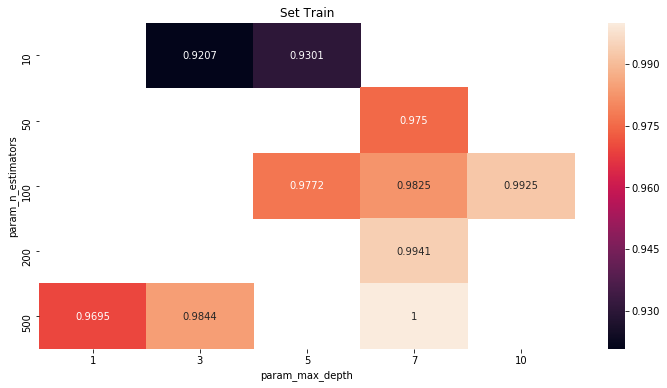

In [41]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set Train'
fmt = 'png'
sns.heatmap(best_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

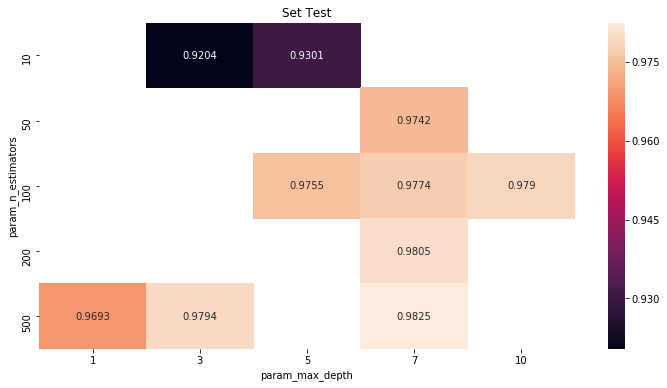

In [42]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set Test'
fmt = 'png'
sns.heatmap(best_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

In [47]:
clf=xgb.XGBClassifier(n_jobs=-1,random_state=42,max_depth=7,n_estimators=50)
clf.fit(final_xtr, y_train)
y_pred_test=clf.predict(final_xte)
y_pred_train=clf.predict(final_xtr)

C:\Users\Himanshu Pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Himanshu Pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_pred_train))
print('Test f1 score',f1_score(y_test,y_pred_test))

Train f1 score 0.9747258760818014
Test f1 score 0.9314958296286888


Train confusion_matrix


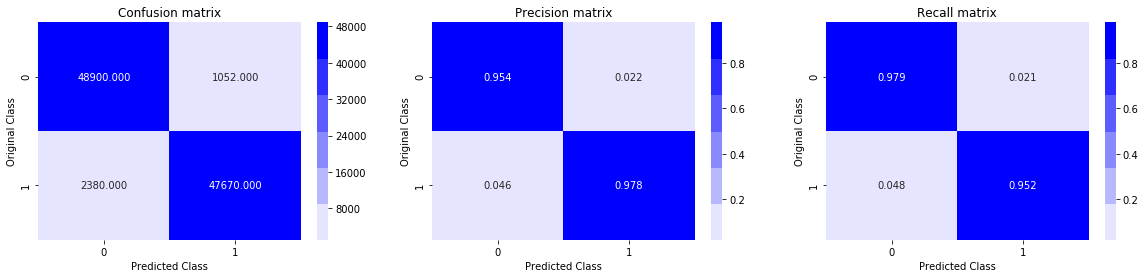

Test confusion_matrix


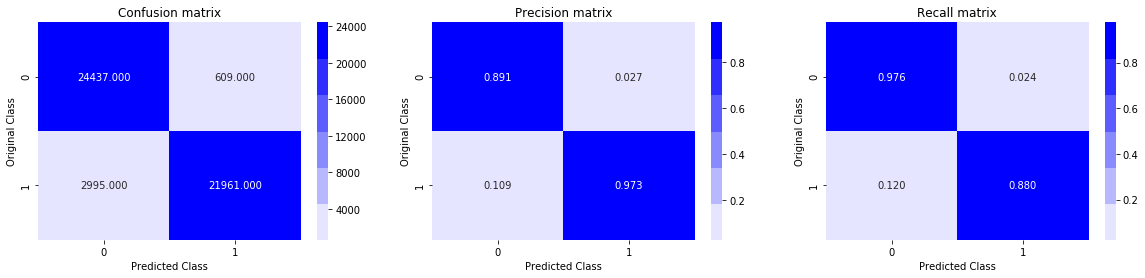

In [49]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

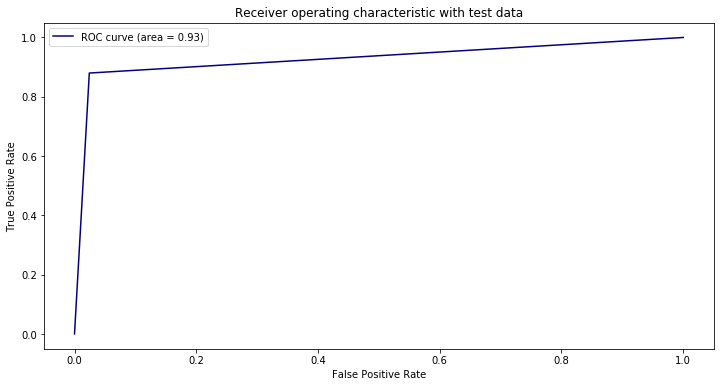

In [50]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

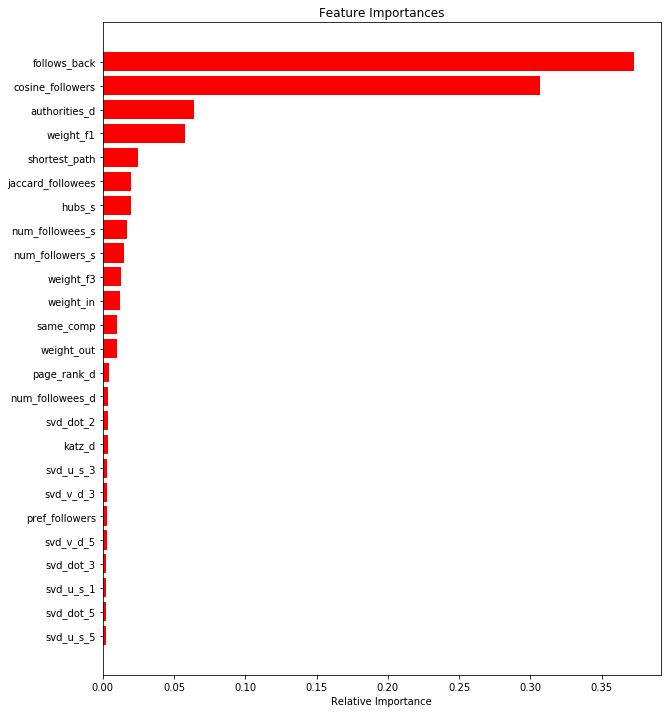

In [51]:
features = final_xtr.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [52]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Sr. No.", "Model Name", "n_estimators", "max_depth", "Train F1 Score", "Test F1 Score"]
x.add_row(["1", 'XGBOOST', '50', '7', '0.974', '0.931'])
print(x)

+---------+------------+--------------+-----------+----------------+---------------+
| Sr. No. | Model Name | n_estimators | max_depth | Train F1 Score | Test F1 Score |
+---------+------------+--------------+-----------+----------------+---------------+
|    1    |  XGBOOST   |      50      |     7     |     0.974      |     0.931     |
+---------+------------+--------------+-----------+----------------+---------------+


### Observations :- 

1. We started with just two features in our dataset & then we performed numerous feature engineering on the given dataset to get more features.


2. We obtained features like Jaccard distance, Katz similarity, shortest distance, page rank etc.


3. Later we also obtained some advanced features like preferential attachment & svd dot.


4. On inculcating these features in our dataset we were able to improve our model slightly.


5. On applying Hyperparameter Tuned XGBoost along with the above features we were able to get a F1-score of 0.974 & 0.931 on our train & test data respectively.